In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))  # Added closing parenthesis here

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/polymorphous-light-eruption-33.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/milia-11.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/pseudo-porphyria-2.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-12.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/phototoxic-reactions-72.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/melasma-34.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/vitiligo-4.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/milia-3.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/porphyrias-51.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/erythema-ab-igne-16.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/m

In [2]:
import os

# Define dataset path
train_dir = "/kaggle/input/dermnet/train"  

# Initialize empty list to store data
data = []

# Loop through each subfolder (disease name)
for disease in os.listdir(train_dir):
    disease_path = os.path.join(train_dir, disease)
    
    # Check if it's a directory (to avoid any unwanted files)
    if os.path.isdir(disease_path):
        # Loop through all images in the disease folder
        for img in os.listdir(disease_path):
            img_path = os.path.join(disease_path, img)
            data.append([img_path, disease])

In [3]:
# Convert list to DataFrame
df = pd.DataFrame(data, columns=["Image_Path", "Disease"])

In [4]:
df.sample(7)

Image_Path  \
4709   /kaggle/input/dermnet/train/Tinea Ringworm Can...   
803    /kaggle/input/dermnet/train/Lupus and other Co...   
529    /kaggle/input/dermnet/train/Light Diseases and...   
5525   /kaggle/input/dermnet/train/Tinea Ringworm Can...   
3948   /kaggle/input/dermnet/train/Bullous Disease Ph...   
12530  /kaggle/input/dermnet/train/Seborrheic Keratos...   
1177   /kaggle/input/dermnet/train/Acne and Rosacea P...   

                                                 Disease  
4709   Tinea Ringworm Candidiasis and other Fungal In...  
803           Lupus and other Connective Tissue diseases  
529         Light Diseases and Disorders of Pigmentation  
5525   Tinea Ringworm Candidiasis and other Fungal In...  
3948                              Bullous Disease Photos  
12530       Seborrheic Keratoses and other Benign Tumors  
1177                             Acne and Rosacea Photos

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

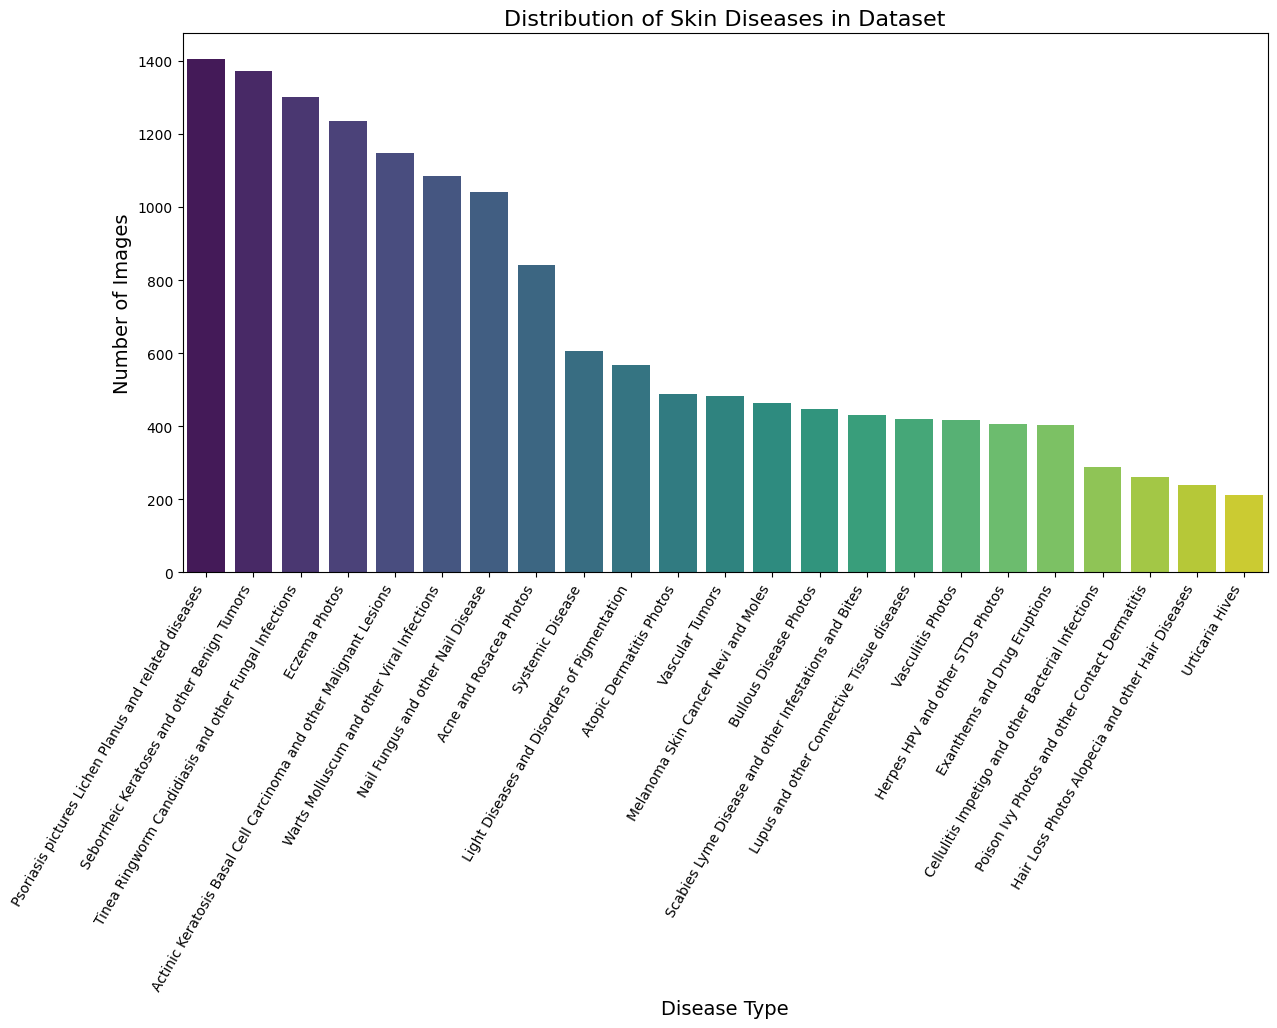

In [6]:
# Count the number of images per disease
disease_counts = df["Disease"].value_counts()

# Plot the bar chart
plt.figure(figsize=(14, 7))  # Increased figure size
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Disease Type", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.title("Distribution of Skin Diseases in Dataset", fontsize=16)
plt.xticks(rotation=60, ha="right")  # Rotate labels more and align right
plt.show()

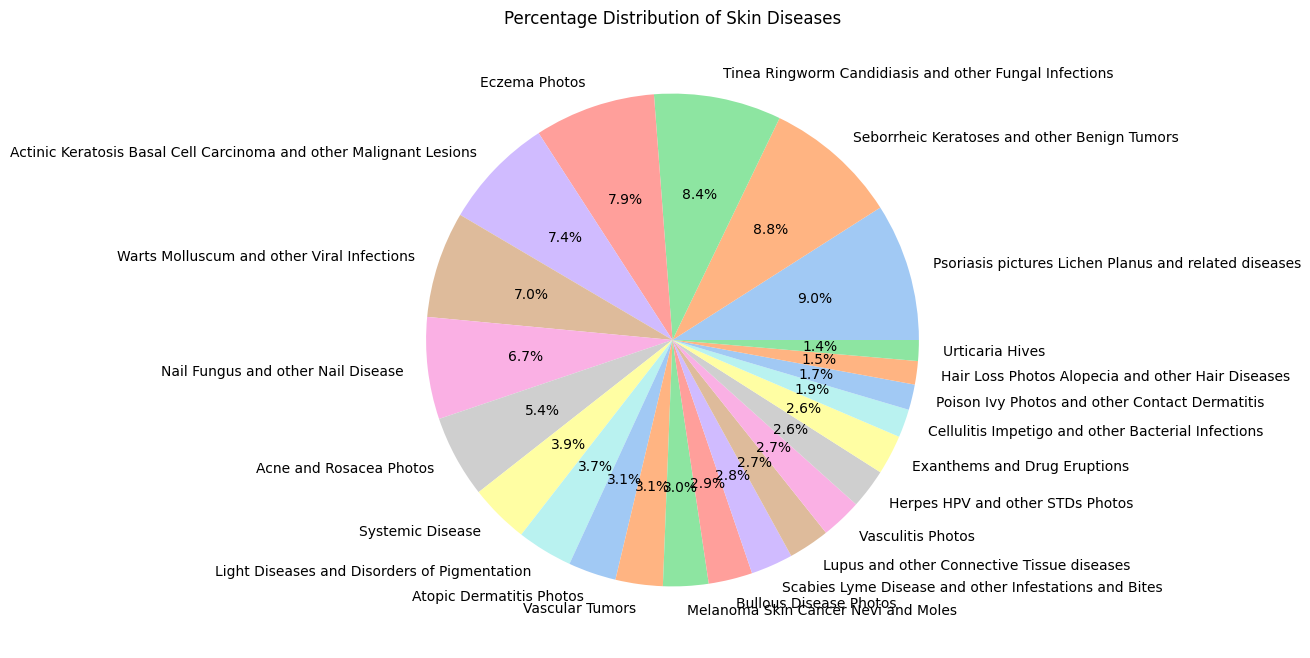

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(disease_counts.values, labels=disease_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Percentage Distribution of Skin Diseases")
plt.show()

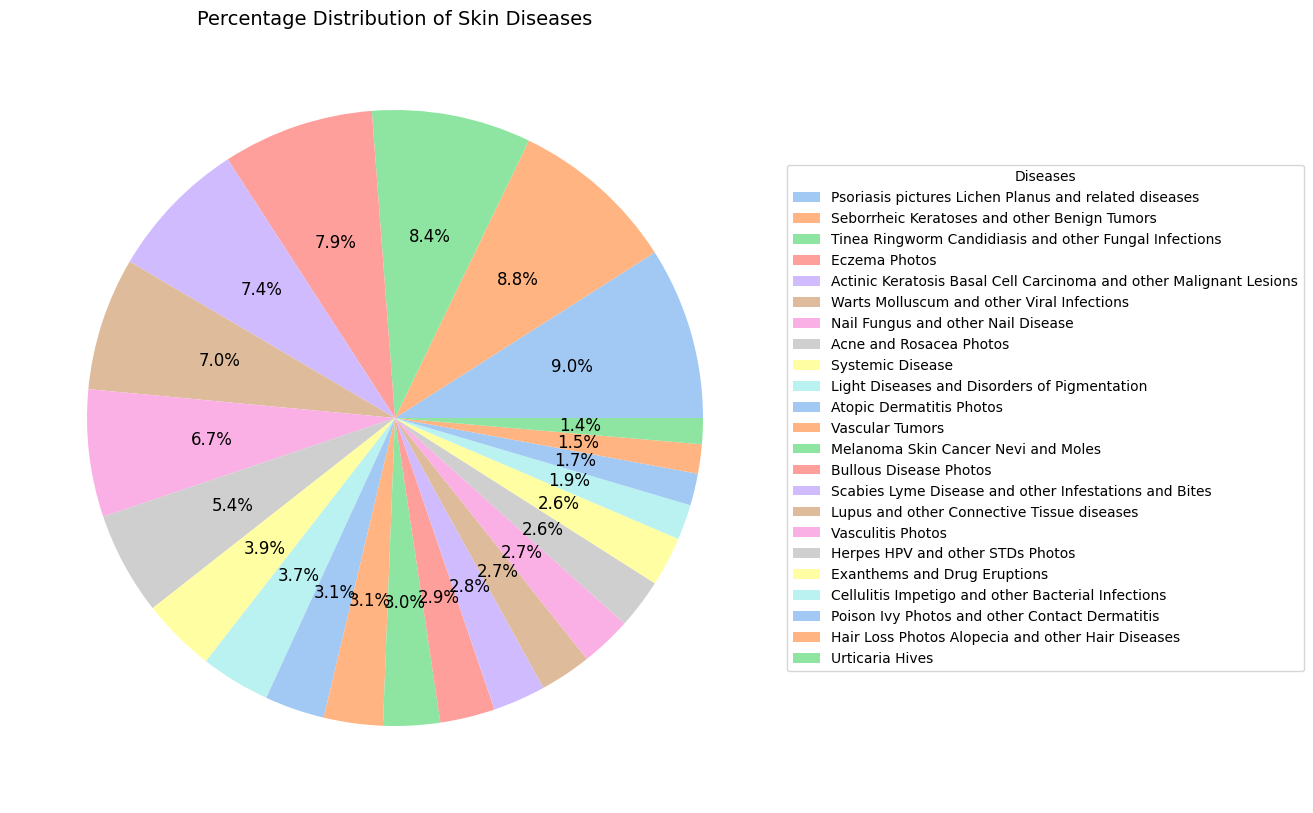

In [10]:
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    disease_counts.values, autopct='%1.1f%%', colors=sns.color_palette("pastel"), textprops={'fontsize': 12}
)

# Add legend instead of labels on the pie chart
plt.legend(wedges, disease_counts.index, title="Diseases", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Percentage Distribution of Skin Diseases", fontsize=14)
plt.show()

In [11]:
df["Disease"].value_counts()  

Disease
Psoriasis pictures Lichen Planus and related diseases                 1405
Seborrheic Keratoses and other Benign Tumors                          1371
Tinea Ringworm Candidiasis and other Fungal Infections                1300
Eczema Photos                                                         1235
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions    1149
Warts Molluscum and other Viral Infections                            1086
Nail Fungus and other Nail Disease                                    1040
Acne and Rosacea Photos                                                840
Systemic Disease                                                       606
Light Diseases and Disorders of Pigmentation                           568
Atopic Dermatitis Photos                                               489
Vascular Tumors                                                        482
Melanoma Skin Cancer Nevi and Moles                                    463
Bullous Disease P

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


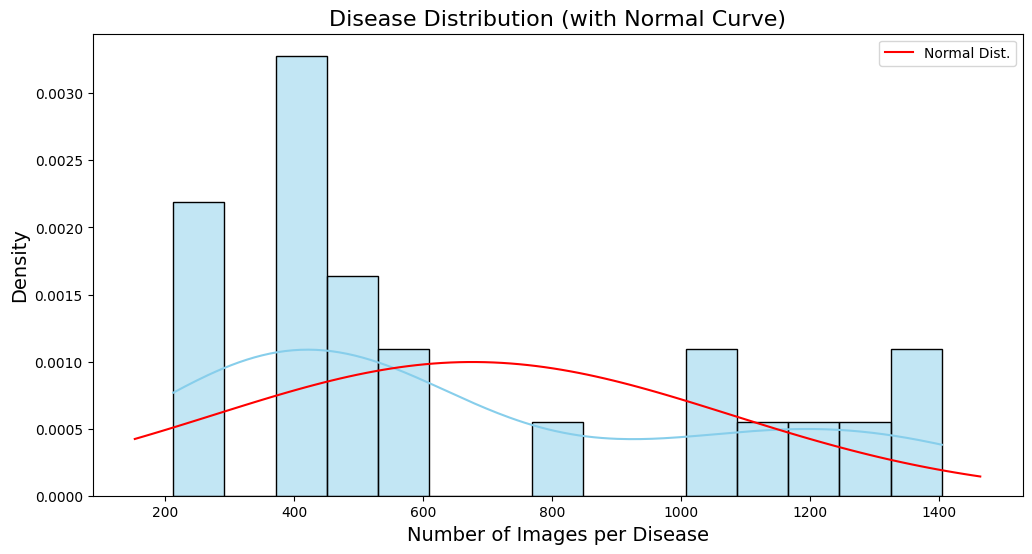

In [12]:
from scipy.stats import norm

# Count occurrences of each disease
disease_counts = df["Disease"].value_counts()

# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(disease_counts, kde=True, bins=15, stat="density", color="skyblue")

# Add normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mean = disease_counts.mean()
std = disease_counts.std()
plt.plot(x, norm.pdf(x, mean, std), 'r', label="Normal Dist.")

# Labels and title
plt.xlabel("Number of Images per Disease", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Disease Distribution (with Normal Curve)", fontsize=16)
plt.legend()
plt.show()

In [16]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [17]:
data_dir_train = pathlib.Path("/kaggle/input/dermnet/train")
data_dir_test = pathlib.Path("/kaggle/input/dermnet/test")

In [18]:
batch_size = 32
img_height = 180
img_width = 180

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 15557 files belonging to 23 classes.
Using 12446 files for training.


In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 15557 files belonging to 23 classes.
Using 3111 files for validation.


In [21]:
class_names = train_ds.class_names
for i in class_names:
    print(i)
print(f"Number of Classes: {len(class_names)}")

Acne and Rosacea Photos
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Atopic Dermatitis Photos
Bullous Disease Photos
Cellulitis Impetigo and other Bacterial Infections
Eczema Photos
Exanthems and Drug Eruptions
Hair Loss Photos Alopecia and other Hair Diseases
Herpes HPV and other STDs Photos
Light Diseases and Disorders of Pigmentation
Lupus and other Connective Tissue diseases
Melanoma Skin Cancer Nevi and Moles
Nail Fungus and other Nail Disease
Poison Ivy Photos and other Contact Dermatitis
Psoriasis pictures Lichen Planus and related diseases
Scabies Lyme Disease and other Infestations and Bites
Seborrheic Keratoses and other Benign Tumors
Systemic Disease
Tinea Ringworm Candidiasis and other Fungal Infections
Urticaria Hives
Vascular Tumors
Vasculitis Photos
Warts Molluscum and other Viral Infections
Number of Classes: 23


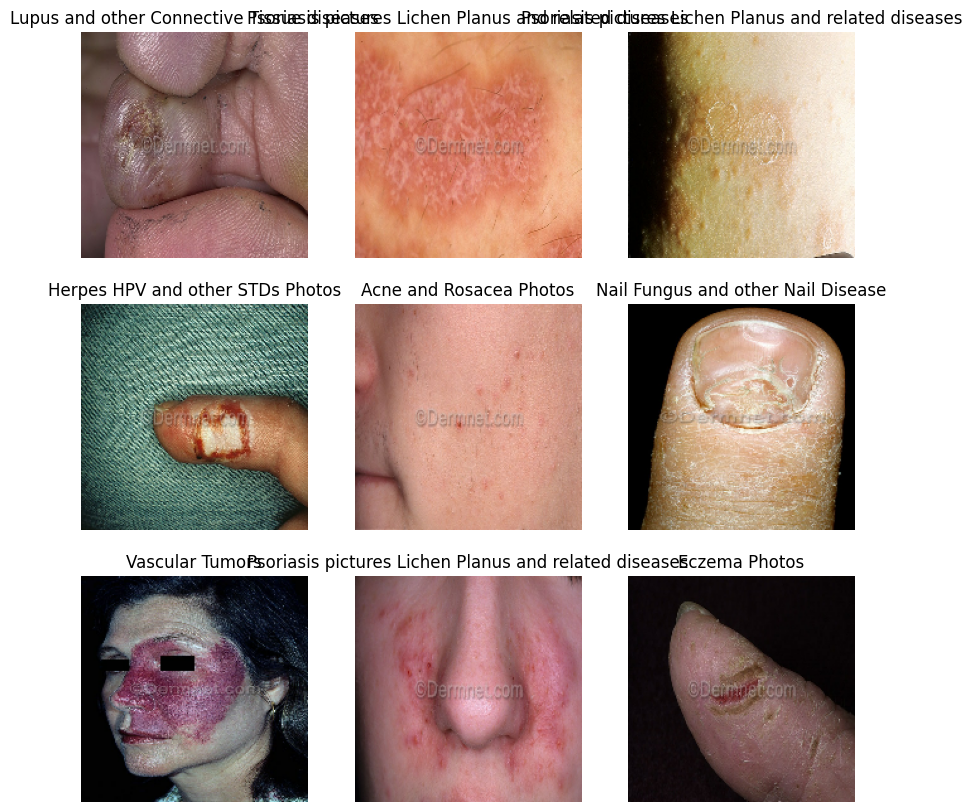

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
num_classes = 23
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 23)                  │           2,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,991,607 (15.23 MB)

 Trainable params: 3,991,607 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 85s 67ms/step - accuracy: 0.1341 - loss: 2.9055 - val_accuracy: 0.1787 - val_loss: 2.7553
Epoch 2/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2089 - loss: 2.6477 - val_accuracy: 0.2186 - val_loss: 2.6760
Epoch 3/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2777 - loss: 2.4231 - val_accuracy: 0.2260 - val_loss: 2.6769
Epoch 4/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3625 - loss: 2.1001 - val_accuracy: 0.2388 - val_loss: 2.8218
Epoch 5/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5058 - loss: 1.6521 - val_accuracy: 0.2562 - val_loss: 3.1637
Epoch 6/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6343 - loss: 1.2332 - val_accuracy: 0.2565 - val_loss: 3.6019
Epoch 7/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7465 - loss: 0.8707 - val_accuracy: 0.2414 - val_loss: 4.5285
Epoch 8/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8380 - loss: 0.5910 - val_acc

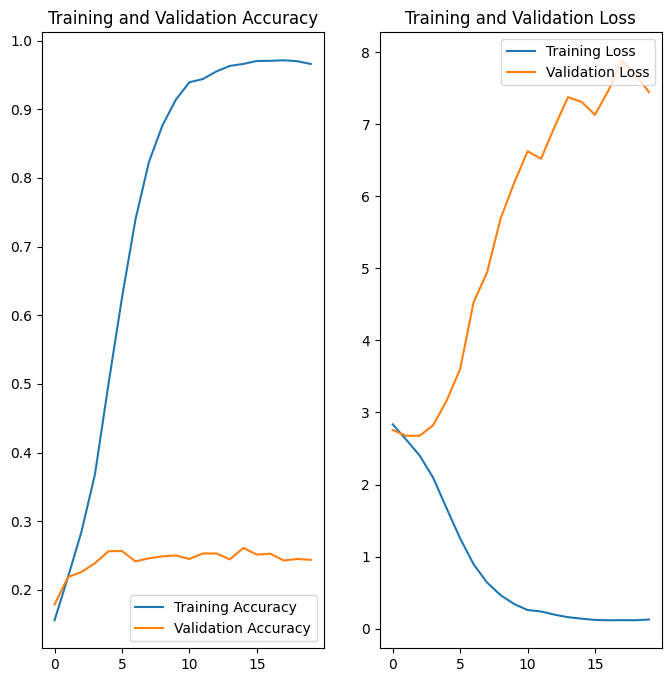

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

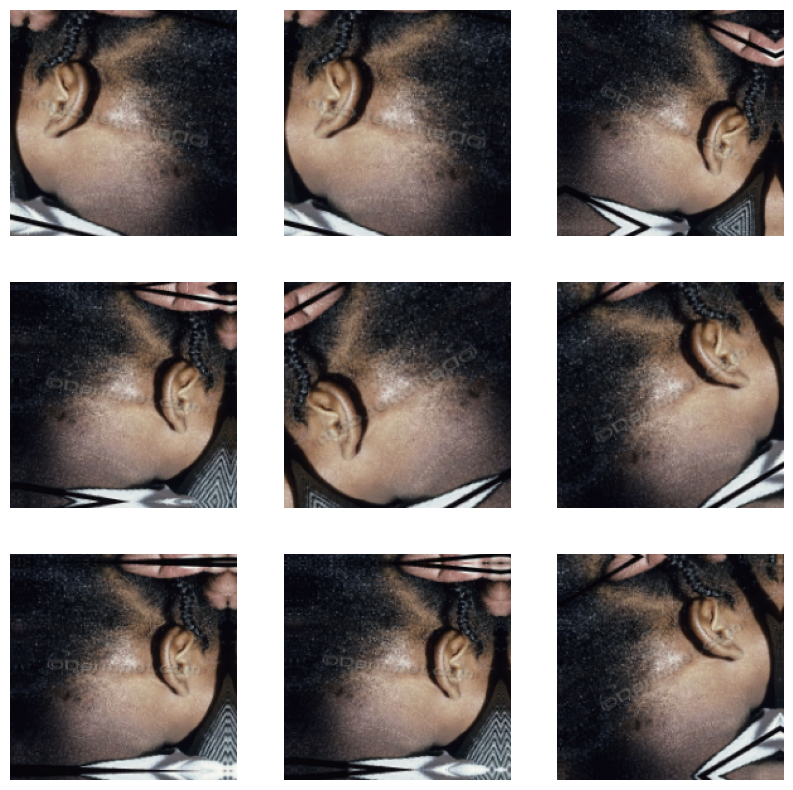

In [30]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [31]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),  
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)  
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.1106 - loss: 2.9693 - val_accuracy: 0.1610 - val_loss: 2.8434
Epoch 2/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1650 - loss: 2.8081 - val_accuracy: 0.2038 - val_loss: 2.7763
Epoch 3/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1961 - loss: 2.7184 - val_accuracy: 0.2131 - val_loss: 2.7061
Epoch 4/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.2249 - loss: 2.6363 - val_accuracy: 0.2324 - val_loss: 2.6521
Epoch 5/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.2386 - loss: 2.5835 - val_accuracy: 0.2437 - val_loss: 2.5904
Epoch 6/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.2485 - loss: 2.5290 - val_accuracy: 0.2533 - val_loss: 2.6051
Epoch 7/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.2624 - loss: 2.4697 - val_accuracy: 0.2324 - val_loss: 2.6318
Epoch 8/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.2753 - loss: 2.4442 - 

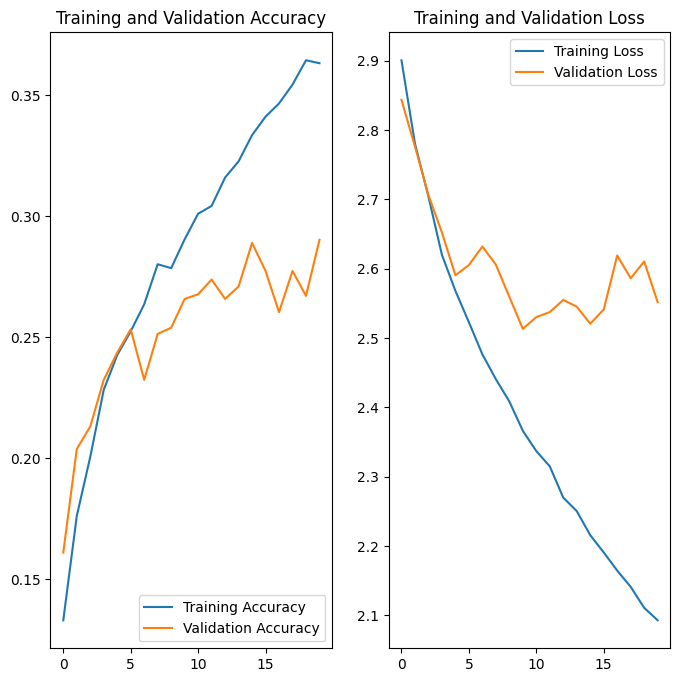

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

15557


In [36]:
df.sample(7)

Image_Path  \
15368  /kaggle/input/dermnet/train/Warts Molluscum an...   
5279   /kaggle/input/dermnet/train/Tinea Ringworm Can...   
1787   /kaggle/input/dermnet/train/Acne and Rosacea P...   
6827   /kaggle/input/dermnet/train/Psoriasis pictures...   
12363  /kaggle/input/dermnet/train/Seborrheic Keratos...   
661    /kaggle/input/dermnet/train/Lupus and other Co...   
8646   /kaggle/input/dermnet/train/Nail Fungus and ot...   

                                                 Disease  
15368         Warts Molluscum and other Viral Infections  
5279   Tinea Ringworm Candidiasis and other Fungal In...  
1787                             Acne and Rosacea Photos  
6827   Psoriasis pictures Lichen Planus and related d...  
12363       Seborrheic Keratoses and other Benign Tumors  
661           Lupus and other Connective Tissue diseases  
8646                  Nail Fungus and other Nail Disease

In [37]:
df[['Disease']].value_counts()

Disease                                                           
Psoriasis pictures Lichen Planus and related diseases                 1405
Seborrheic Keratoses and other Benign Tumors                          1371
Tinea Ringworm Candidiasis and other Fungal Infections                1300
Eczema Photos                                                         1235
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions    1149
Warts Molluscum and other Viral Infections                            1086
Nail Fungus and other Nail Disease                                    1040
Acne and Rosacea Photos                                                840
Systemic Disease                                                       606
Light Diseases and Disorders of Pigmentation                           568
Atopic Dermatitis Photos                                               489
Vascular Tumors                                                        482
Melanoma Skin Cancer Nevi and Mol

In [38]:
df[['Disease']].value_counts(normalize=True)

Disease                                                           
Psoriasis pictures Lichen Planus and related diseases                 0.090313
Seborrheic Keratoses and other Benign Tumors                          0.088128
Tinea Ringworm Candidiasis and other Fungal Infections                0.083564
Eczema Photos                                                         0.079385
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions    0.073857
Warts Molluscum and other Viral Infections                            0.069808
Nail Fungus and other Nail Disease                                    0.066851
Acne and Rosacea Photos                                               0.053995
Systemic Disease                                                      0.038954
Light Diseases and Disorders of Pigmentation                          0.036511
Atopic Dermatitis Photos                                              0.031433
Vascular Tumors                                                 

In [39]:
!pip install Augmentor

In [40]:
import os
import shutil
import random
import Augmentor

# Define paths
path_to_training_dataset = str(data_dir_train) + '/'  # Original dataset path
output_dir = "/kaggle/working/balanced_data/train"  # Writable directory for balanced dataset

# Ensure the balanced directory exists
os.makedirs(output_dir, exist_ok=True)

# Target images per class
target_images = 1000

# Process each class
for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)  # Original class folder
    class_output_path = os.path.join(output_dir, class_name)  # Output folder for balanced images

    # Ensure output directory exists for each class
    os.makedirs(class_output_path, exist_ok=True)

    # Get list of images in the class
    image_files = os.listdir(class_path)
    current_images = len(image_files)

    if current_images > target_images:
        # Reduce images to 1000 by randomly selecting
        selected_images = random.sample(image_files, target_images)
        for img in selected_images:
            shutil.copy(os.path.join(class_path, img), class_output_path)

    elif current_images < target_images:
        # Augment images to reach 1000
        num_to_generate = target_images - current_images
        
        # Apply Augmentor
        p = Augmentor.Pipeline(class_path, output_directory=class_output_path)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.flip_left_right(probability=0.5)
        p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
        
        # Copy existing images first
        for img in image_files:
            shutil.copy(os.path.join(class_path, img), class_output_path)
        
        # Generate the required number of images
        p.sample(num_to_generate)
    else:
        # If exactly 1000, just copy the images
        for img in image_files:
            shutil.copy(os.path.join(class_path, img), class_output_path)

print("Dataset balancing complete! Processed images are stored in:", output_dir)

Initialised with 840 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Acne and Rosacea Photos.

Processing <PIL.Image.Image image mode=RGB size=473x720 at 0x7CF602187F40>: 100%|██████████| 160/160 [00:02<00:00, 55.07 Samples/s]                  


Initialised with 489 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Atopic Dermatitis Photos.

Processing <PIL.Image.Image image mode=RGB size=476x720 at 0x7CF68FF7F670>: 100%|██████████| 511/511 [00:08<00:00, 59.87 Samples/s]                  


Initialised with 448 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Bullous Disease Photos.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x659 at 0x7CF6902F5510>: 100%|██████████| 552/552 [00:10<00:00, 54.66 Samples/s]


Initialised with 288 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Cellulitis Impetigo and other Bacterial Infections.

Processing <PIL.Image.Image image mode=RGB size=577x720 at 0x7CF5F0758CD0>: 100%|██████████| 712/712 [00:13<00:00, 54.19 Samples/s]                  


Initialised with 404 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Exanthems and Drug Eruptions.

Processing <PIL.Image.Image image mode=RGB size=720x464 at 0x7CF5F0753C40>: 100%|██████████| 596/596 [00:10<00:00, 58.61 Samples/s]                  


Initialised with 239 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Hair Loss Photos Alopecia and other Hair Diseases.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7CF68FE3AE00>: 100%|██████████| 761/761 [00:14<00:00, 52.62 Samples/s]                  


Initialised with 405 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Herpes HPV and other STDs Photos.

Processing <PIL.Image.Image image mode=RGB size=720x472 at 0x7CF5F075B490>: 100%|██████████| 595/595 [00:10<00:00, 56.21 Samples/s]                  


Initialised with 568 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Light Diseases and Disorders of Pigmentation.

Processing <PIL.Image.Image image mode=RGB size=395x595 at 0x7CF68FDE7040>: 100%|██████████| 432/432 [00:07<00:00, 57.86 Samples/s]                  


Initialised with 420 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Lupus and other Connective Tissue diseases.

Processing <PIL.Image.Image image mode=RGB size=720x480 at 0x7CF5F06313F0>: 100%|██████████| 580/580 [00:10<00:00, 56.67 Samples/s]                  


Initialised with 463 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Melanoma Skin Cancer Nevi and Moles.

Processing <PIL.Image.Image image mode=RGB size=601x720 at 0x7CF68FDE7580>: 100%|██████████| 537/537 [00:09<00:00, 58.03 Samples/s]                  


Initialised with 260 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Poison Ivy Photos and other Contact Dermatitis.

Processing <PIL.Image.Image image mode=RGB size=720x607 at 0x7CF5F07AFA00>: 100%|██████████| 740/740 [00:13<00:00, 53.85 Samples/s]                  


Initialised with 431 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Scabies Lyme Disease and other Infestations and Bites.

Processing <PIL.Image.Image image mode=RGB size=458x720 at 0x7CF6E0941ED0>: 100%|██████████| 569/569 [00:09<00:00, 57.31 Samples/s]                  


Initialised with 606 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Systemic Disease.

Processing <PIL.Image.Image image mode=RGB size=720x479 at 0x7CF602134880>: 100%|██████████| 394/394 [00:06<00:00, 57.17 Samples/s]                  


Initialised with 212 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Urticaria Hives.

Processing <PIL.Image.Image image mode=RGB size=720x472 at 0x7CF5F07270D0>: 100%|██████████| 788/788 [00:14<00:00, 53.00 Samples/s]                  


Initialised with 482 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Vascular Tumors.

Processing <PIL.Image.Image image mode=RGB size=720x599 at 0x7CF6E1505510>: 100%|██████████| 518/518 [00:10<00:00, 50.80 Samples/s]                  


Initialised with 416 image(s) found.
Output directory set to /kaggle/working/balanced_data/train/Vasculitis Photos.

Processing <PIL.Image.Image image mode=RGB size=720x485 at 0x7CF62D77D240>: 100%|██████████| 584/584 [00:11<00:00, 52.17 Samples/s]                  


Dataset balancing complete! Processed images are stored in: /kaggle/working/balanced_data/train


In [42]:
from pathlib import Path

augmented_dir = Path("/kaggle/working/balanced_data/train")  # Path to the augmented dataset
image_count_train = len(list(augmented_dir.glob('*/*.jpg')))  # Count all .jpg files in subdirectories
print(image_count_train)  # Print the total number of images

23000


In [44]:
import os
from glob import glob

# Change the search path to Kaggle working directory where augmented images are stored
augmented_dir = "/kaggle/working/balanced_data/train"

# Search for images inside subdirectories
path_list_new = glob(os.path.join(augmented_dir, '*', '*.jpg'))

print(len(path_list_new))  # Count of images
print(path_list_new[:2])  # Show first 2 file paths

23000
['/kaggle/working/balanced_data/train/Systemic Disease/necrobiosis-lipoidica-56.jpg', '/kaggle/working/balanced_data/train/Systemic Disease/acrodermatitis-enteropathica-2.jpg']


In [45]:
# Correct path: Searching in Kaggle working directory instead of data_dir_train
augmented_dir = "/kaggle/working/balanced_data/train"

# Get the class names from augmented images
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(augmented_dir, '*', '*.jpg'))]

print(lesion_list_new[:2])  # Print first 2 class names

['Systemic Disease', 'Systemic Disease']


In [46]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [47]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Image_Path', 'Disease'])
new_df = pd.concat([df, df2], ignore_index=True)  
print(new_df.shape)  # Print the shape of the new dataframe

(38557, 2)


In [48]:
new_df.sample(7)

Image_Path  \
10115  /kaggle/input/dermnet/train/Eczema Photos/lich...   
35236  /kaggle/working/balanced_data/train/Urticaria ...   
16275  /kaggle/working/balanced_data/train/Systemic D...   
21982  /kaggle/working/balanced_data/train/Atopic Der...   
29688  /kaggle/working/balanced_data/train/Vascular T...   
23605  /kaggle/working/balanced_data/train/Cellulitis...   
20687  /kaggle/working/balanced_data/train/Vasculitis...   

                                                 Disease  
10115                                      Eczema Photos  
35236                                    Urticaria Hives  
16275                                   Systemic Disease  
21982                           Atopic Dermatitis Photos  
29688                                    Vascular Tumors  
23605  Cellulitis Impetigo and other Bacterial Infect...  
20687                                  Vasculitis Photos

In [49]:
# Checking the class distribution after adding 1000 samples per label
new_df['Disease'].value_counts(normalize=True)

Disease
Psoriasis pictures Lichen Planus and related diseases                 0.062375
Seborrheic Keratoses and other Benign Tumors                          0.061493
Tinea Ringworm Candidiasis and other Fungal Infections                0.059652
Eczema Photos                                                         0.057966
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions    0.055736
Warts Molluscum and other Viral Infections                            0.054102
Nail Fungus and other Nail Disease                                    0.052909
Acne and Rosacea Photos                                               0.047722
Systemic Disease                                                      0.041653
Light Diseases and Disorders of Pigmentation                          0.040667
Atopic Dermatitis Photos                                              0.038618
Vascular Tumors                                                       0.038437
Melanoma Skin Cancer Nevi and Moles         

In [50]:
new_df['Disease'].value_counts()

Disease
Psoriasis pictures Lichen Planus and related diseases                 2405
Seborrheic Keratoses and other Benign Tumors                          2371
Tinea Ringworm Candidiasis and other Fungal Infections                2300
Eczema Photos                                                         2235
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions    2149
Warts Molluscum and other Viral Infections                            2086
Nail Fungus and other Nail Disease                                    2040
Acne and Rosacea Photos                                               1840
Systemic Disease                                                      1606
Light Diseases and Disorders of Pigmentation                          1568
Atopic Dermatitis Photos                                              1489
Vascular Tumors                                                       1482
Melanoma Skin Cancer Nevi and Moles                                   1463
Bullous Disease P

In [51]:
data_dir_train = "/kaggle/working/balanced_data/train"

In [52]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23000 files belonging to 23 classes.
Using 18400 files for training.


In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23000 files belonging to 23 classes.
Using 4600 files for validation.


In [55]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.0708 - loss: 3.0980 - val_accuracy: 0.1472 - val_loss: 2.9203
Epoch 2/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.1389 - loss: 2.9175 - val_accuracy: 0.1741 - val_loss: 2.8065
Epoch 3/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.1711 - loss: 2.7947 - val_accuracy: 0.2057 - val_loss: 2.7136
Epoch 4/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.2010 - loss: 2.6911 - val_accuracy: 0.2239 - val_loss: 2.6449
Epoch 5/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.2299 - loss: 2.6109 - val_accuracy: 0.2393 - val_loss: 2.6229
Epoch 6/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.2498 - loss: 2.5442 - val_accuracy: 0.2311 - val_loss: 2.6718
Epoch 7/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.2724 - loss: 2.4729 - val_accuracy: 0.2635 - val_loss: 2.5841
Epoch 8/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.2905 - loss: 2.4192 - 

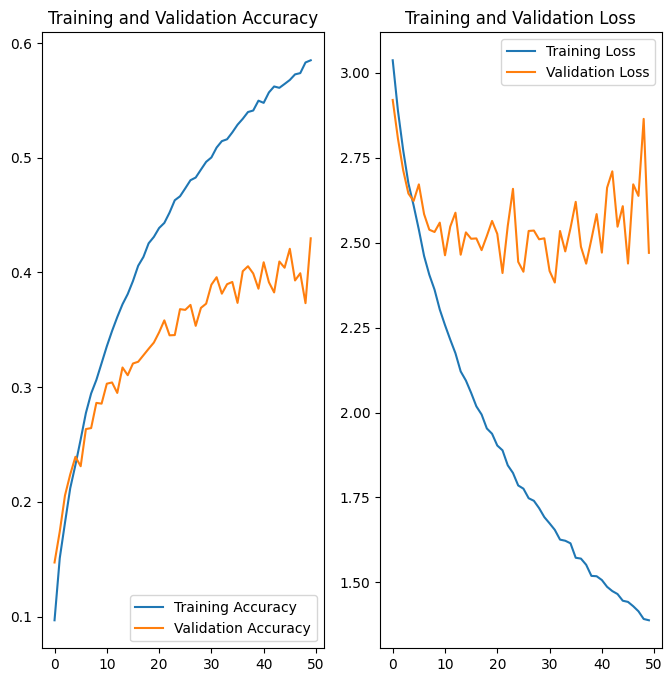

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load EfficientNetB3 with input size 180x180
base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(180, 180, 3))

# Freeze the base model initially
base_model.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.4)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(23, activation='softmax')(x)  # ✅ Fixed: Connected to x

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Callbacks for better training
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print model summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_7 (Rescaling)   │ (None, 180, 180, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 180, 180, 3)    │              7 │ rescaling_7[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_8 (Rescaling)   │ (None, 180, 180, 3)    │              0 │ normalization_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 181, 181, 3)    │              0 │ rescaling_8[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 90, 90, 40)     │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 90, 90, 40)     │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 90, 90, 40)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 90, 90, 40)     │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 90, 90, 40)     │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 90, 90, 40)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 11,582,278 (44.18 MB)

 Trainable params: 798,743 (3.05 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Adjust based on performance
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/30
575/575 ━━━━━━━━━━━━━━━━━━━━ 91s 95ms/step - accuracy: 0.1284 - loss: 3.0264 - val_accuracy: 0.2678 - val_loss: 2.5312 - learning_rate: 1.0000e-04
Epoch 2/30
575/575 ━━━━━━━━━━━━━━━━━━━━ 37s 64ms/step - accuracy: 0.2518 - loss: 2.5835 - val_accuracy: 0.3087 - val_loss: 2.3662 - learning_rate: 1.0000e-04
Epoch 3/30
575/575 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.2920 - loss: 2.4270 - val_accuracy: 0.3372 - val_loss: 2.2691 - learning_rate: 1.0000e-04
Epoch 4/30
575/575 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.3157 - loss: 2.3388 - val_accuracy: 0.3604 - val_loss: 2.1994 - learning_rate: 1.0000e-04
Epoch 5/30
575/575 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.3405 - loss: 2.2592 - val_accuracy: 0.3802 - val_loss: 2.1408 - learning_rate: 1.0000e-04
Epoch 6/30
575/575 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.3548 - loss: 2.2111 - val_accuracy: 0.3887 - val_loss: 2.0959 - learning_rate: 1.0000e-04
Epoch 7/30
575/575 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/ste

In [38]:
# !rm -rf /kaggle/working/*

In [ ]:
# print("Training dataset directory:", data_dir_train)